# Natural Language Processing
![](https://i.imgur.com/qkg2E2D.png)

## Assignment 004 - BERT-based NER Tagger

> Notebook by:
> - NLP Course Stuff
## Revision History

| Version | Date       | User        | Content / Changes                                                   |
|---------|------------|-------------|---------------------------------------------------------------------|
| 0.1.000 | 09/06/2024 | course staff| First version                                                       |


## Overview
In this assignment, you will further work on assignment 3, that is, you will build a complete training and testing pipeline for a neural sequential tagger for named entities using BERT, this time.

**This assignment is not mandatory, we will take the 3/4 best grades, but we recomment you doing it.**

## Dataset
You will work with the ReCoNLL 2003 dataset, a corrected version of the [CoNLL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/):

**Click on those links so you have access to the data!**
- [Train data](https://drive.google.com/file/d/1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf/view?usp=sharing)

- [Dev data](https://drive.google.com/file/d/1rdUida-j3OXcwftITBlgOh8nURhAYUDw/view?usp=sharing)

- [Test data](https://drive.google.com/file/d/137Ht40OfflcsE6BIYshHbT5b2iIJVaDx/view?usp=sharing)

As you will see, the annotated texts are labeled according to the `IOB` annotation scheme (more on this below), for 3 entity types: Person, Organization, Location.

## Your Implementation

Please create a local copy of this template Colab's Notebook:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KGkObwUn5QQm_v0nB0nAUlB4YrwThuzl#scrollTo=Z-fCqGh9ybgm)

The assignment's instructions are there; follow the notebook.

## Submission
- **Notebook Link**: Add the URL to your assignment's notebook in the `notebook_link.txt` file, following the format provided in the example.
- **Access**: Ensure the link has edit permissions enabled to allow modifications if needed.
- **Deadline**: <font color='green'>27/06/2024</font>.
- **Platform**: Continue using GitHub for submissions. Push your project to the team repository and monitor the test results under the actions section.

Good Luck 🤗


<!-- ## NER schemes:  

> `IO`: is the simplest scheme that can be applied to this task. In this scheme, each token from the dataset is assigned one of two tags: an inside tag (`I`) and an outside tag (`O`). The `I` tag is for named entities, whereas the `O` tag is for normal words. This scheme has a limitation, as it cannot correctly encode consecutive entities of the same type.

> `IOB`: This scheme is also referred to in the literature as BIO and has been adopted by the Conference on Computational Natural Language Learning (CoNLL) [1]. It assigns a tag to each word in the text, determining whether it is the beginning (`B`) of a known named entity, inside (`I`) it, or outside (`O`) of any known named entities.

> `IOE`: This scheme works nearly identically to `IOB`, but it indicates the end of the entity (`E` tag) instead of its beginning.

> `IOBES`: An alternative to the IOB scheme is `IOBES`, which increases the amount of information related to the boundaries of named entities. In addition to tagging words at the beginning (`B`), inside (`I`), end (`E`), and outside (`O`) of a named entity. It also labels single-token entities with the tag `S`.

> `BI`: This scheme tags entities in a similar method to `IOB`. Additionally, it labels the beginning of non-entity words with the tag B-O and the rest as I-O.

> `IE`: This scheme works exactly like `IOE` with the distinction that it labels the end of non-entity words with the tag `E-O` and the rest as `I-O`.

> `BIES`: This scheme encodes the entities similar to `IOBES`. In addition, it also encodes the non-entity words using the same method. It uses `B-O` to tag the beginning of non-entity words, `I-O` to tag the inside of non-entity words, and `S-O` for single non-entity tokens that exist between two entities. -->


## NER Schemes

### IO
- **Description**: The simplest scheme for named entity recognition (NER).
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
- **Limitation**: Cannot correctly encode consecutive entities of the same type.

### IOB (BIO)
- **Description**: Adopted by the Conference on Computational Natural Language Learning (CoNLL).
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
- **Advantage**: Can encode the boundaries of consecutive entities.

### IOE
- **Description**: Similar to IOB, but indicates the end of an entity.
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
- **Advantage**: Focuses on the end boundary of entities.

### IOBES
- **Description**: An extension of IOB with additional boundary information.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `S`: Single-token named entity.
- **Advantage**: Provides more detailed boundary information for named entities.

### BI
- **Description**: Tags entities similarly to IOB and labels the beginning of non-entity words.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `B-O`: Beginning of a non-entity word.
  - `I-O`: Inside a non-entity word.
- **Advantage**: Distinguishes the beginning of non-entity sequences.

### IE
- **Description**: Similar to IOE but for non-entity words.
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `E-O`: End of a non-entity word.
  - `I-O`: Inside a non-entity word.
- **Advantage**: Highlights the end of non-entity sequences.

### BIES
- **Description**: Encodes both entities and non-entity words using the IOBES method.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `S`: Single-token named entity.
  - `B-O`: Beginning of a non-entity word.
  - `I-O`: Inside a non-entity word.
  - `S-O`: Single non-entity token.
- **Advantage**: Comprehensive encoding for both entities and non-entities.




In [294]:
!mkdir data
# Fetch data
# train_link = 'https://drive.google.com/file/d/1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf/view?usp=sharing'
# dev_link   = 'https://drive.google.com/file/d/1rdUida-j3OXcwftITBlgOh8nURhAYUDw/view?usp=sharing'
# test_link  = 'https://drive.google.com/file/d/137Ht40OfflcsE6BIYshHbT5b2iIJVaDx/view?usp=sharing'

!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf' -O data/train.txt
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rdUida-j3OXcwftITBlgOh8nURhAYUDw' -O data/dev.txt
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=137Ht40OfflcsE6BIYshHbT5b2iIJVaDx' -O data/test.txt


mkdir: cannot create directory ‘data’: File exists


In [295]:
# Any additional needed libraries
!pip install -qU transformers[torch] wandb

In [296]:
# Standard Library Imports
import os
import copy
import random
import warnings
from collections import defaultdict
from typing import Optional
import json
from google.colab import files

# ML
import numpy as np
import scipy as sp
import pandas as pd

# Visual
import matplotlib
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display

# DL
import torch as th
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score , roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay
import wandb


In [297]:
model_name = 'bert-base-uncased'
SEED = 42
# Set the random seed for Python
random.seed(SEED)

# Set the random seed for numpy
np.random.seed(SEED)

# Set the random seed for pytorch
th.manual_seed(SEED)

# If using CUDA (for GPU operations)
th.cuda.manual_seed(SEED)

# Set up the device
DEVICE = "cuda" if th.cuda.is_available() else "cpu"
# assert DEVICE == "cuda"

DataType = dict[str, list[list[str]]]

# Part 1 - Dataset Preparation

## Step 1: Read Data
Write a function for reading the data from a single file (of the ones that are provided above).   
- The function recieves a filepath
- The funtion encodes every sentence individually using a pair of lists, one list contains the words and one list contains the tags.
- The function returns a dictionary of the texts as a list and the tags as a list.

Example output:
```
{
  "texts": [
    ['At','Trent','Bridge',':'],
    ...],
  "tags":[
    ['O','B-LOC','I-LOC ','O'],
    ...]
  ...
}
```

In [298]:
def read_data(filepath:str) -> DataType:
  """
  Read data from a single file.
  The function recieves a filepath
  The funtion encodes every sentence using a pair of lists, one list contains the words and one list contains the tags.
  :param filepath: path to the file
  :return: data as a list of tuples
  """
  data = {
    "texts": [],
    "tags": []
  }
  # TO DO ----------------------------------------------------------------------
  with open(filepath, 'r', encoding='utf-8') as file:
        sentence = []
        tags = []

        for line in file:
            if line.strip() == '':
                # Check that the sentence and tags lists are not empty
                if sentence and tags:
                    data["texts"].append(sentence)
                    data["tags"].append(tags)
                sentence = []
                tags = []
            else:
                splits = line.strip().split()
                word = splits[0]
                tag = splits[-1]
                sentence.append(word)
                tags.append(tag)

        # Add the last sentence if it's non-empty and not added
        if sentence and tags:
            data["texts"].append(sentence)
            data["tags"].append(tags)
  return data

In [299]:
train_raw = read_data("data/train.txt")
dev_raw = read_data("data/dev.txt")
test_raw = read_data("data/test.txt")
print(f"Train size: {len(train_raw['texts'])}")
print(f"Dev size: {len(dev_raw['texts'])}")
print(f"Test size: {len(test_raw['texts'])}")

Train size: 1750
Dev size: 250
Test size: 500


## Step 2: Prepare Data
Write a function `prepare_data` that takes one of the [train, dev, test], and encodes it to tensors.

### Your Task
1. Load the BERT Tokenizer
2. Tokenize the data and encode the labels

In [300]:
# Prepare tag2id dictionaries
tag2id = {}
id2tag = {}
tags = ["O", "B-PER", "I-PER", "B-LOC", "I-LOC", "B-ORG", "I-ORG"]
for tag in tags:
  tag2id[tag] = len(tag2id)
  id2tag[len(id2tag)] = tag

In [301]:
tag2id

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-LOC': 3,
 'I-LOC': 4,
 'B-ORG': 5,
 'I-ORG': 6}

In [302]:
tokenizer = None
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [303]:
def prepare_data(data: dict[str, list[list[str]]], tag2id: dict[str, int]) -> dict[str, th.Tensor]:
    enc_data = {
        "texts": [],
        "labels": []
    }

    # Calculate the maximum length of the sequences
    max_length = max(len(text) for text in data["texts"])

    # Tokenize the texts and prepare labels
    for text, tags in zip(data["texts"], data["tags"]):
        # Encode the text
        encoding = tokenizer(text, is_split_into_words=True, truncation=True, padding='max_length', max_length=max_length, return_tensors="pt")
        input_ids = encoding['input_ids'][0]  # Get the tensor for input_ids

        # Map the tags to their IDs and pad them to the same length as input IDs
        labels = [tag2id[tag] for tag in tags]
        labels += [tag2id["O"]] * (input_ids.shape[0] - len(labels))

        # Add the input IDs and labels to the lists
        enc_data["texts"].append(input_ids)
        enc_data["labels"].append(th.tensor(labels))

    # Stack the lists to create tensors
    enc_data["texts"] = th.stack(enc_data["texts"])
    enc_data["labels"] = th.stack(enc_data["labels"])

    return enc_data


In [304]:
train_sequences = prepare_data(train_raw, tag2id)
dev_sequences = prepare_data(dev_raw, tag2id)
test_sequences = prepare_data(test_raw, tag2id)

## Step 3: Dataset
Create datasets for each split in the dataset. They should return the samples as Tensors.


In [305]:
class NERDataset(Dataset):
  def __init__(self, data):
    self.data = data

  def __len__(self):
    return len(self.data["texts"])

  def __getitem__(self, idx):
    return {
      'input_ids': th.tensor(self.data["texts"][idx]),
      'labels': th.tensor(self.data["labels"][idx])
    }

In [306]:
train_ds = None
dev_ds = None
test_ds = None
# TO DO ----------------------------------------------------------------------
train_ds = NERDataset(train_sequences)
dev_ds = NERDataset(dev_sequences)
test_ds = NERDataset(test_sequences)
# TO DO ----------------------------------------------------------------------

<br><br><br><br><br><br>

# Part 2 - NER Model Training

## Step 1: Load Model

Load a token classification model.

In [307]:
model = None
def load_model(model_name: str, tag2id) -> nn.Module:
# TO DO ----------------------------------------------------------------------
  return AutoModelForTokenClassification.from_pretrained(
    model_name,
    num_labels=len(tag2id),  # we would need to have number of output labels based on the tag2id dictionary
    id2label={id: tag for tag, id in tag2id.items()},  # as the label is the id for the tags
    label2id=tag2id)  # Providing the label2id mapping)


# TO DO ----------------------------------------------------------------------
model = load_model(model_name, tag2id)
model

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

## Step 2: Training

Write a training function that utilizes the huggingface Trainer. The function should log the loss of both train dataset and the dev one every here and there.

In [308]:
N_EPOCHS = 5
# TO DO ----------------------------------------------------------------------
BATCH_SIZE = 20
WARMUP_STEPS = 500
WEIGHT_DECAY = 0.01
# TO DO ----------------------------------------------------------------------

In [309]:
# Initialize Weights & Biases

wandb.init()

test/loss,▂▂▄▄▆▆██▁▁▁▁
test/runtime,▂▁▂▁▃▁▃▂██▆▆
test/samples_per_second,▅█▅▇▁▇▂▄▁▂▄▅
test/steps_per_second,▁▂▂▂▃▄▇█▆▇▁▁
train/epoch,▂▃▆▁▃▅▇█▂▃▅▆▇▁▁▂▃▃▄▅▅▆▆▇█▁▂▂▃▃▄▅▅▆▆▇█▂▅▇
train/global_step,▁▂▂▁▂▂▃▁▂▂▃▃▄▁▂▂▃▄▄▅▅▆▇▇█▁▂▃▃▄▄▅▅▆▇▇█▂▂▃
train/grad_norm,▂▁▂▂▂▂▂▂▂▃▁▂▂▁▁▂▁▃▁▃▂▁▂▁▁█▂▆▂▃▂▂▂▃▂▄▂▂▁▂
train/learning_rate,▂▃▅▁▄▆▇▁▃▆█▅▃▁▃▆█▇▇▆▅▄▃▂▁▁▄▆▇▇▆▆▅▄▃▂▁▁▄▆
train/loss,▄▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▄▃▂▂▂▂▁▂▂▂▁▅▃▂
test/loss,0.10314
test/runtime,1.5341


In [310]:
def train_model(model, n_epochs: int, batch_size: int, train_ds: Dataset, dev_ds: Dataset) -> Trainer:
  """
  Train a model.
  :param model: model instance
  :param n_epochs: number of epochs to train on
  :param batch_size: batch size
  :param train_ds: train dataset
  :param dev_ds: dev dataset
  :return: loss and accuracy during training
  """
  # TO DO ----------------------------------------------------------------------
  training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=n_epochs,       # total number of training epochs
    per_device_train_batch_size=batch_size,  # batch size per device during training
    per_device_eval_batch_size=batch_size,   # batch size for evaluation
    warmup_steps=WARMUP_STEPS,                # number of warmup steps for learning rate scheduler
    weight_decay=WEIGHT_DECAY,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    use_cpu=not th.cuda.is_available()
  )

  # Create the Trainer and train
  trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_ds,              # training dataset
    eval_dataset=dev_ds,                 # evaluation dataset
  )

  trainer.train()

  return trainer
  # TO DO ----------------------------------------------------------------------

In [311]:
    # Watch the model with wandb
    wandb.watch(model, log_freq=15)

    # Train the model
    trainer = train_model(model, N_EPOCHS, BATCH_SIZE, train_ds, dev_ds)

<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


Step,Training Loss
10,2.069600
20,1.747200
30,1.215900
40,0.669400
50,0.367300
60,0.304400
70,0.300600
80,0.262200
90,0.245700
100,0.222300


<br><br><br><br><br><br>

# Part 3 - Evaluation


## Step 1: Evaluation Function

Write an evaluation function for a trained model using the dev and test datasets. This function will print the `Recall`, `Precision`, and `F1` scores and plot a `Confusion Matrix`.

Perform this evaluation twice:
1. For all labels (7 labels in total).
2. For all labels except "O" (6 labels in total).

## Metrics and Display

### Metrics
- **Recall**: True Positive Rate (TPR), also known as Recall.
- **Precision**: The opposite of False Positive Rate (FPR), also known as Precision.
- **F1 Score**: The harmonic mean of Precision and Recall.

*Note*: For all these metrics, use **weighted** averaging:
Calculate metrics for each label, and find their average weighted by support. Refer to the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) for more details.

### Display
1. Print the `Recall`, `Precision`, and `F1` scores in a tabulated format.
2. Display a `Confusion Matrix` plot:
   - Rows represent the predicted labels.
   - Columns represent the true labels.
   - Include a title for the plot, axis names, and the names of the tags on the X-axis.

In [312]:
def evaluate(trainer: Trainer, title: str, dataset: Dataset, tag2id: dict[str, int]):
  """
  Evaluate a trained model on the given dataset.
  :param trainer: trainer instance containing a trained model
  :param title: title for the plot
  :param dataset: dataset
  :param tag2id: tag2id dictionary
  :return: Dictionary of evaluation results
  """
  results = {}
  # TO DO ----------------------------------------------------------------------
  # Generate predictions
  predictions, labels, _ = trainer.predict(dataset)

  # Flatten the predictions and labels
  predictions = np.argmax(predictions, axis=2).flatten()
  labels = labels.flatten()

  # Calculate precision, recall, and F1 score
  precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

  # Print the metrics in a tabulated format
  metrics_table = [["Precision", precision, True], ["Recall", recall, True], ["F1 Score", f1, True]]

  # Calculate the confusion matrix
  cm = confusion_matrix(labels, predictions)

  # Plot the confusion matrix
  plt.figure(figsize=(10, 10))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tag2id.keys())
  disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
  plt.title(title)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.show()

  results = {'PRECISION': precision, 'RECALL': recall, 'F1': f1}

  # Generate predictions
  predictions, labels, _ = trainer.predict(dataset)

  # Flatten the predictions and labels
  predictions = np.argmax(predictions, axis=2).flatten()
  labels = labels.flatten()

  # Exclude 'O' label
  exclude_O_indices = np.where(labels == 0)
  labels = np.delete(labels, exclude_O_indices, axis=0)
  predictions = np.delete(predictions, exclude_O_indices, axis=0)

  exclude_O_indices = np.where(predictions == 0)
  labels = np.delete(labels, exclude_O_indices, axis=0)
  predictions = np.delete(predictions, exclude_O_indices, axis=0)

  # Calculate precision, recall, and F1 score
  precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')



  # Calculate the confusion matrix
  cm = confusion_matrix(labels, predictions)

  # Plot the confusion matrix
  plt.figure(figsize=(10, 10))
  disp_labels = [id2tag[i] for i in range(len(tag2id)) if i != tag2id['O']]
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=disp_labels)
  disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')
  plt.title(title + " W/O O")
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.show()

  results["F1_WO_O"] = f1
  results["PRECISION_WO_O"] = precision
  results["RECALL_WO_O"] = recall
  # Print the metrics in a tabulated format
  metrics_table.append(["Precision", precision, False])
  metrics_table.append(["Recall", recall, False])
  metrics_table.append(["F1 Score", f1, False])
  print(tabulate(metrics_table, headers=["Metric", "Score", "With O"]))
  return results

<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


<Figure size 1000x1000 with 0 Axes>

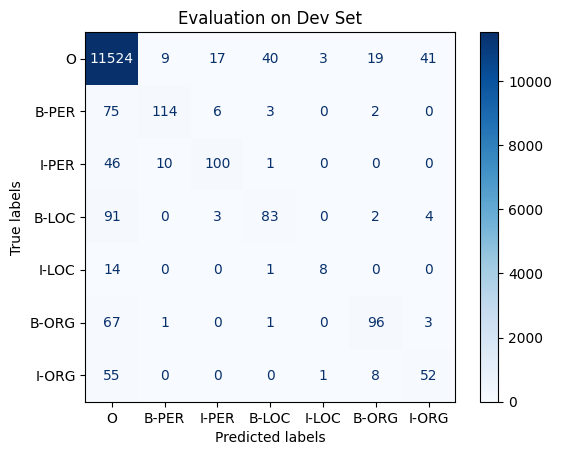

<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


<Figure size 1000x1000 with 0 Axes>

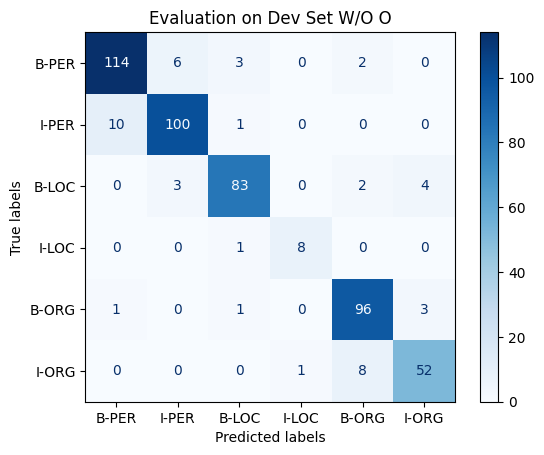

Metric        Score  With O
---------  --------  --------
Precision  0.954125  True
Recall     0.95816   True
F1 Score   0.954982  True
Precision  0.908163  False
Recall     0.907816  False
F1 Score   0.907688  False


In [313]:
# Assuming model is trained, and dl_dev is the DataLoader for dev dataset
results = evaluate(trainer, "Evaluation on Dev Set", dev_ds, tag2id)

## Step 2 - Logs and Visualization
Explore and intagrate [wandb](https://wandb.ai/home) as a logging and visualization tool. Integrate it in the training and evaluation steps. Look for the plots of the loss (train, eval) and see how useful it can be :) Also make sure to log some results, such as plots and funal results before printing.

## Step 3: Development
Experiment your training with diffenet Hyperparameters and optimize them based on the results on the **development set**.

Decide which model performs the best. Note that this time the parameters changes will be inside the model initialization or the train functions and will not be given as parameters to the load_model function. So just hard-code them in the other functions.

Training with hyperparameters: {'batch_size': 15, 'warmup_steps': 500, 'weight_decay': 0.01, 'description': 'Batch size=15 on Dev set'}


<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


Step,Training Loss
10,0.070700
20,0.070000
30,0.068900
40,0.061800
50,0.061700
60,0.055700
70,0.059200
80,0.062800
90,0.084400
100,0.084400


<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])
<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTens

<Figure size 1000x1000 with 0 Axes>

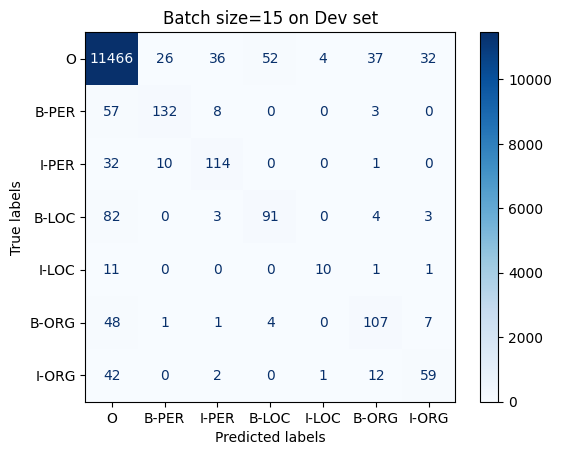

<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


<Figure size 1000x1000 with 0 Axes>

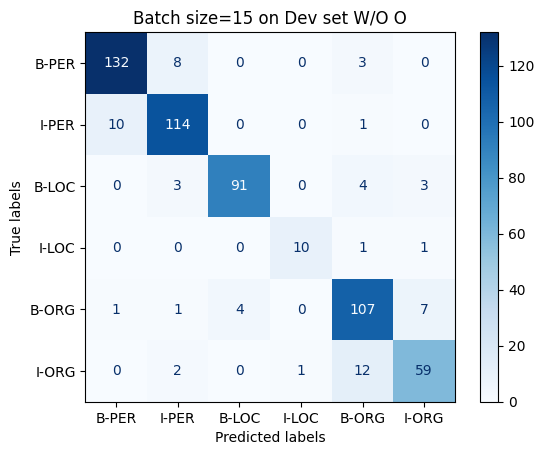

Metric        Score  With O
---------  --------  --------
Precision  0.956238  True
Recall     0.95832   True
F1 Score   0.957018  True
Precision  0.893337  False
Recall     0.892174  False
F1 Score   0.892271  False
Training with hyperparameters: {'batch_size': 10, 'warmup_steps': 500, 'weight_decay': 0.001, 'description': 'Batch size=10, Weight decay=0.001 on Dev set'}


<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


Step,Training Loss
10,0.023700
20,0.015900
30,0.027200
40,0.019100
50,0.021100
60,0.015700
70,0.021500
80,0.022000
90,0.011300
100,0.017100


<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])
<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTens

<Figure size 1000x1000 with 0 Axes>

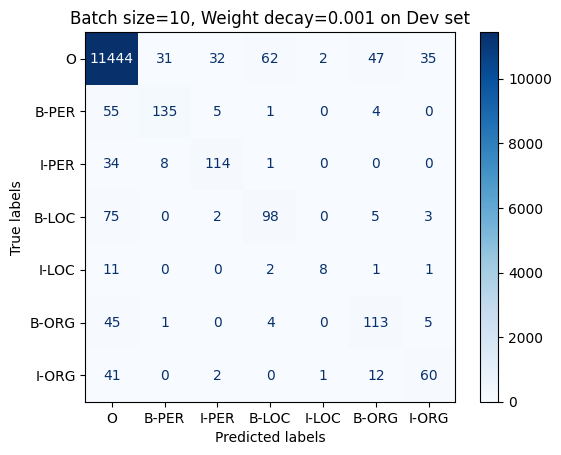

<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


<Figure size 1000x1000 with 0 Axes>

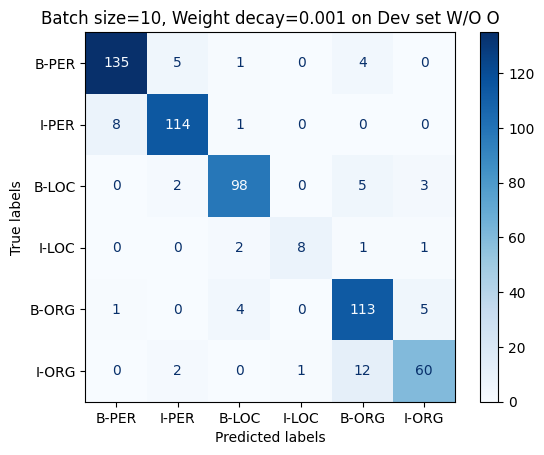

Metric        Score  With O
---------  --------  --------
Precision  0.95661   True
Recall     0.95776   True
F1 Score   0.956961  True
Precision  0.902092  False
Recall     0.901024  False
F1 Score   0.900632  False
Training with hyperparameters: {'batch_size': 5, 'warmup_steps': 500, 'weight_decay': 0.0001, 'description': 'Batch size=5, Weight decay=0.0001 on Dev set'}


<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


Step,Training Loss
10,0.007300
20,0.004200
30,0.004100
40,0.002100
50,0.002000
60,0.008800
70,0.005600
80,0.005800
90,0.006800
100,0.005100


<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])
<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTens

<Figure size 1000x1000 with 0 Axes>

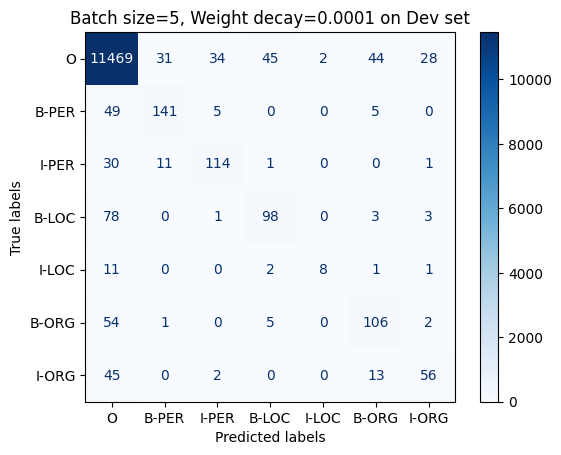

<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


<Figure size 1000x1000 with 0 Axes>

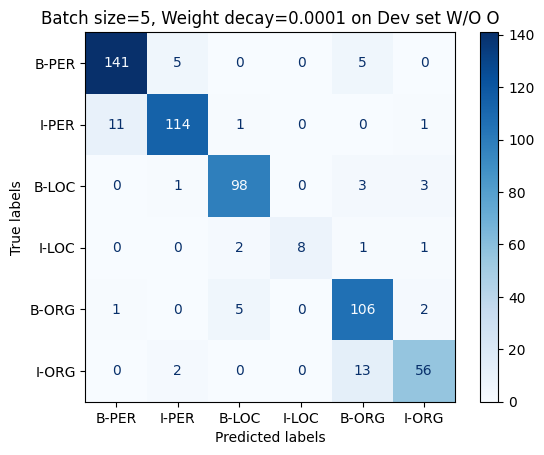

Metric        Score  With O
---------  --------  --------
Precision  0.957437  True
Recall     0.95936   True
F1 Score   0.958048  True
Precision  0.904176  False
Recall     0.901724  False
F1 Score   0.901221  False
Best Hyperparameters: {'batch_size': 5, 'warmup_steps': 500, 'weight_decay': 0.0001, 'description': 'Batch size=5, Weight decay=0.0001 on Dev set'}
Best Results: {'PRECISION': 0.9574374113804479, 'RECALL': 0.95936, 'F1': 0.9580477125410938, 'F1_WO_O': 0.9012209004282521, 'PRECISION_WO_O': 0.9041755632790747, 'RECALL_WO_O': 0.9017241379310345}


In [314]:
# Hyperparameter sets
hyperparameters_list = [
    {'batch_size': 15, 'warmup_steps': 500, 'weight_decay': 0.01, 'description': "Batch size=15 on Dev set"},
    {'batch_size': 10, 'warmup_steps': 500, 'weight_decay': 0.001, 'description': "Batch size=10, Weight decay=0.001 on Dev set"},
    {'batch_size': 5, 'warmup_steps': 500, 'weight_decay': 0.0001, 'description': "Batch size=5, Weight decay=0.0001 on Dev set"}
]

best_results = None
best_hyperparameters = None

for hyperparams in hyperparameters_list:
    print(f"Training with hyperparameters: {hyperparams}")

    # Update global WARMUP_STEPS and WEIGHT_DECAY from the hyperparameters
    WARMUP_STEPS = hyperparams['warmup_steps']
    WEIGHT_DECAY = hyperparams['weight_decay']

    # Train the model
    trainer = train_model(model, N_EPOCHS, hyperparams['batch_size'], train_ds, dev_ds)

    # Evaluate the model
    results = evaluate(trainer, hyperparams['description'], dev_ds, tag2id)

    # Compare results to find the best model
    if best_results is None or results['F1'] > best_results['F1']:
        best_results = results
        best_hyperparameters = hyperparams

print("Best Hyperparameters:", best_hyperparameters)
print("Best Results:", best_results)

## Step 4 - Final Evaluation
After configring your params such that the model loaded is the best one,train it, evaluate it on the test set and print the results. This part simulates the real world data.

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


Step,Training Loss
10,1.836700
20,1.537200
30,1.046100
40,0.577800
50,0.345400
60,0.331700
70,0.241600
80,0.290100
90,0.274600
100,0.238300


<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])
<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTens

<Figure size 1000x1000 with 0 Axes>

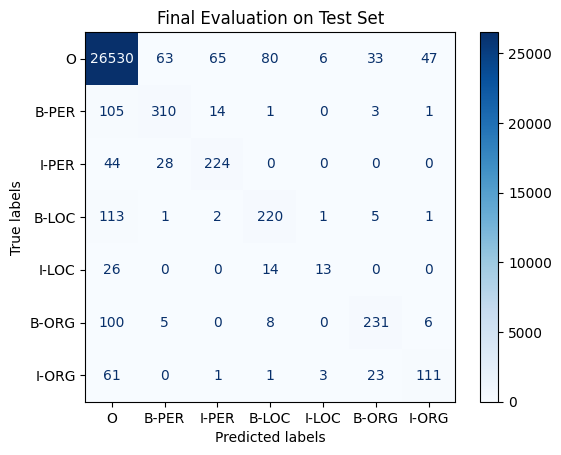

<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


<Figure size 1000x1000 with 0 Axes>

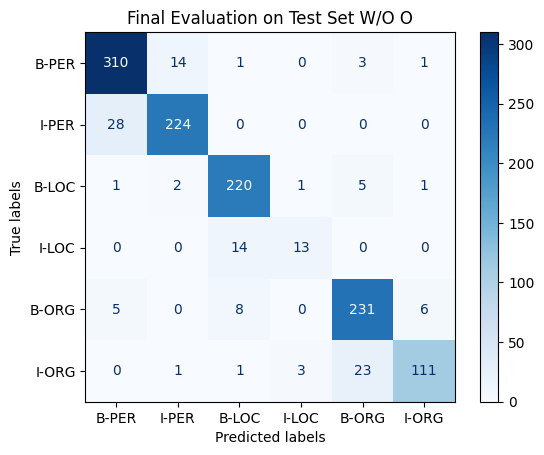

Metric        Score  With O
---------  --------  --------
Precision  0.968263  True
Recall     0.969789  True
F1 Score   0.968779  True
Precision  0.903672  False
Recall     0.90383   False
F1 Score   0.901985  False
Test Results: {'PRECISION': 0.9682626295000271, 'RECALL': 0.9697894736842105, 'F1': 0.9687792754279485, 'F1_WO_O': 0.9019852113729219, 'PRECISION_WO_O': 0.9036724059059101, 'RECALL_WO_O': 0.9038304808475958}


In [315]:
model = None
model = load_model(model_name, tag2id)
# Final evaluation on the test set
# Final evaluation on the test set
WARMUP_STEPS = best_hyperparameters['warmup_steps']
WEIGHT_DECAY = best_hyperparameters['weight_decay']
final_trainer = train_model(model, N_EPOCHS, best_hyperparameters['batch_size'], train_ds, dev_ds)
test_results = evaluate(final_trainer, "Final Evaluation on Test Set", test_ds, tag2id)

print("Test Results:", test_results)

<br><br><br><br><br>

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


Step,Training Loss
10,1.817000
20,1.541200
30,1.031000
40,0.555600
50,0.347900
60,0.307300
70,0.311900
80,0.265900
90,0.248500
100,0.221600


<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


<Figure size 1000x1000 with 0 Axes>

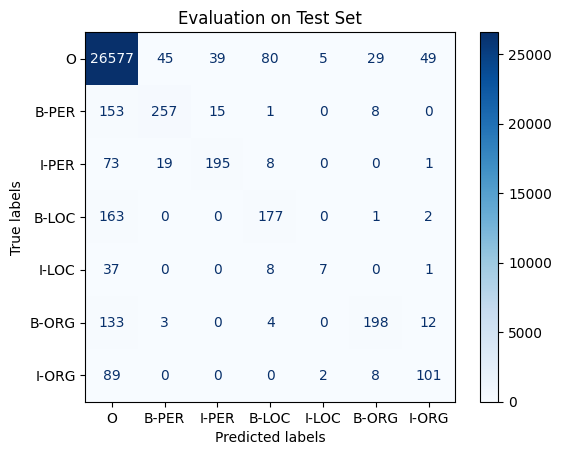

<ipython-input-305-6b7beb081b0a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': th.tensor(self.data["texts"][idx]),
<ipython-input-305-6b7beb081b0a>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'labels': th.tensor(self.data["labels"][idx])


<Figure size 1000x1000 with 0 Axes>

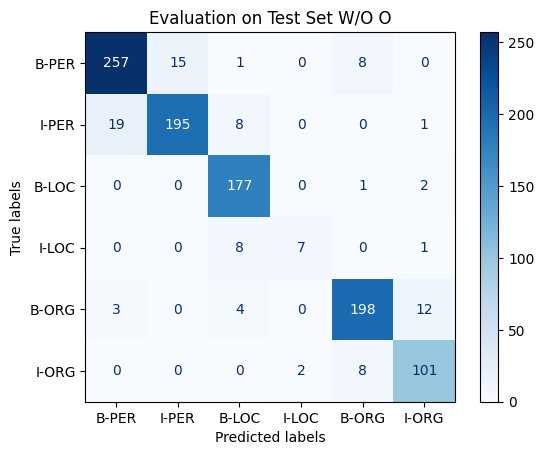

Metric        Score  With O
---------  --------  --------
Precision  0.961831  True
Recall     0.965333  True
F1 Score   0.962675  True
Precision  0.909465  False
Recall     0.909533  False
F1 Score   0.908135  False


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [316]:
####################
# PLACE TESTS HERE #
####################

####################
# PLACE TESTS HERE #
train_raw = read_data("data/train.txt")
dev_raw = read_data("data/dev.txt")
test_raw = read_data("data/test.txt")
def test_read_data():
    result = {
        'lengths': (len(train_raw["texts"]), len(dev_raw["texts"]), len(test_raw["texts"])),
    }
    return result

train_sequences = prepare_data(train_raw, tag2id)
dev_sequences = prepare_data(dev_raw, tag2id)
test_sequences = prepare_data(test_raw, tag2id)

def test_prepare_data():
    result = {
        'dev_texts_shape': dev_sequences["texts"]["input_ids"].shape,
        'train_labels_shape': train_sequences["labels"].shape,
    }
    return result

train_ds = NERDataset(train_sequences)
dev_ds = NERDataset(dev_sequences)
test_ds = NERDataset(test_sequences)

N_EPOCHS = 5
def test_model():
    # Create model
    model = load_model(model_name, tag2id)

    # Train model and evaluate
    trainer = train_model(model, N_EPOCHS, BATCH_SIZE, train_ds, dev_ds)

    results_eval = evaluate(trainer, "Evaluation on Test Set", test_ds, tag2id)

    return {
        'f1': results_eval['F1'],
        'f1_wo_o': results_eval['F1_WO_O'],
    }

TESTS = [
    test_read_data,
    test_prepare_data,
    test_model,
]

# Run tests and save results
res = {}
for test in TESTS:
    try:
        cur_res = test()
        res.update({test.__name__: cur_res})
    except Exception as e:
        res.update({test.__name__: repr(e)})

with open('results.json', 'w') as f:
    json.dump(res, f, indent=2)

# Download the results.json file
files.download('results.json')

####################

